In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
customer_df = pd.read_csv('./Churn_Modelling.csv')

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
customer_df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
customer_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
customer_df= customer_df.drop('RowNumber', axis=1)
customer_df= customer_df.drop('CustomerId', axis=1)
customer_df= customer_df.drop('Surname', axis=1)

## Basic Data Overview

In [9]:
# Basic Data Overview
print("First few rows of the dataset:")
customer_df.head()



First few rows of the dataset:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
print("\nDataset Info:")
print(customer_df.info())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


In [11]:
print("\nSummary statistics:")
customer_df.describe()




Summary statistics:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
# Check for missing values
print("\nMissing values in each column:")
print(customer_df.isnull().sum())

# Distribution of Target Variable
print("\nDistribution of the target variable (Exited):")
print(customer_df['Exited'].value_counts())


Missing values in each column:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Distribution of the target variable (Exited):
Exited
0    7963
1    2037
Name: count, dtype: int64


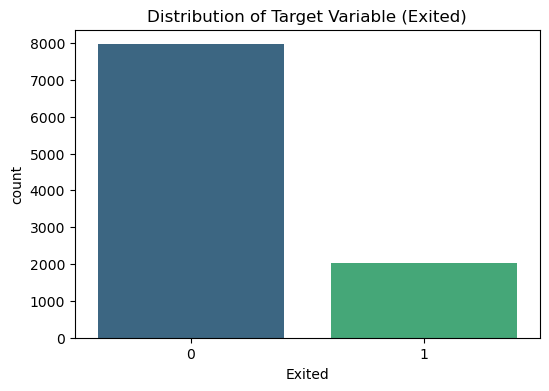

In [13]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=customer_df, palette='viridis')
plt.title('Distribution of Target Variable (Exited)')
plt.show()

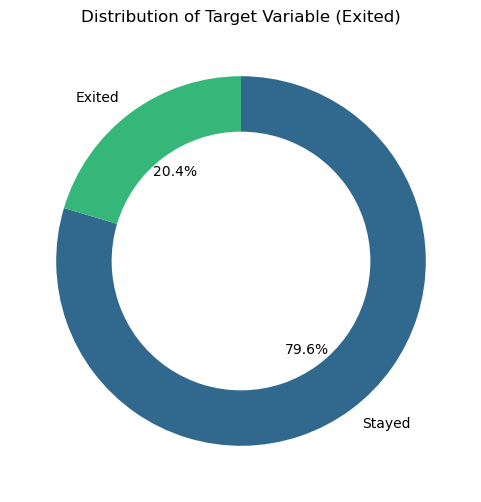

In [20]:
import matplotlib.pyplot as plt

sizes = customer_df['Exited'].value_counts(normalize=True) * 100
labels = ['Stayed', 'Exited']
colors = sns.color_palette('viridis', len(sizes))

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'width': 0.3})
plt.title('Distribution of Target Variable (Exited)')
plt.show()



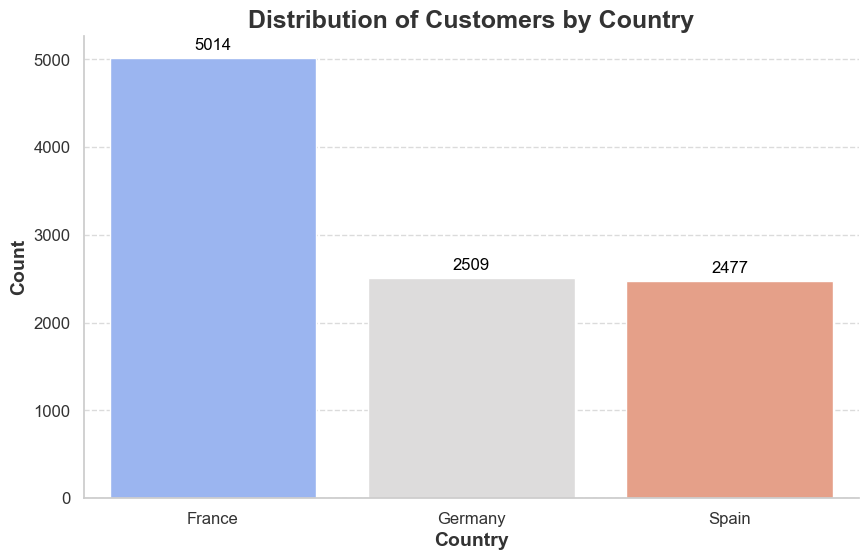

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a stylish theme
sns.set_theme(style="whitegrid")

# Create a color palette with shades of blue
palette = sns.color_palette("coolwarm", 3)  # 3 colors for the three categories

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Geography', data=customer_df, palette=palette, order=customer_df['Geography'].value_counts().index)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=12, color='black')

# Set the title and labels with custom font sizes
plt.title('Distribution of Customers by Country', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Country', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#333333')

# Customize the ticks on the x and y axes
plt.xticks(fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Remove the top and right spines for a cleaner look
sns.despine()

# Add gridlines for better readability
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


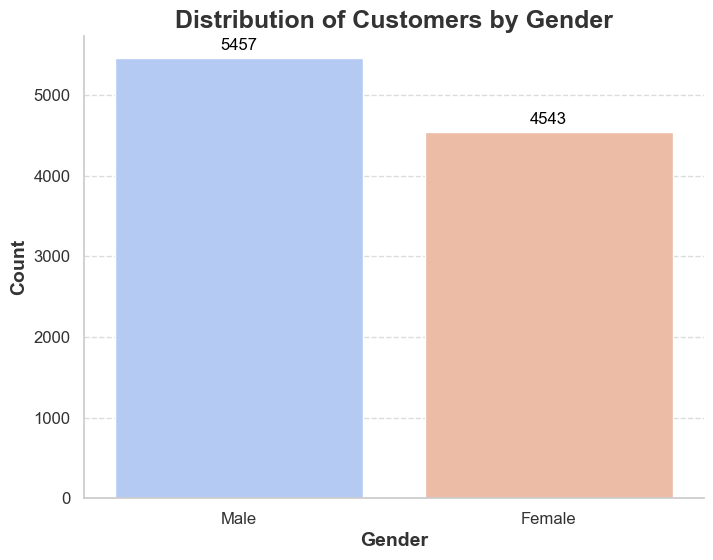

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a stylish theme
sns.set_theme(style="whitegrid")

# Create a color palette with contrasting colors for Gender
palette = sns.color_palette("coolwarm", 2)  # 2 colors for the two categories (Male, Female)

# Create the bar chart for Gender distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', data=customer_df, palette=palette, order=customer_df['Gender'].value_counts().index)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=12, color='black')

# Set the title and labels with custom font sizes
plt.title('Distribution of Customers by Gender', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Gender', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#333333')

# Customize the ticks on the x and y axes
plt.xticks(fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Remove the top and right spines for a cleaner look
sns.despine()

# Add gridlines for better readability
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


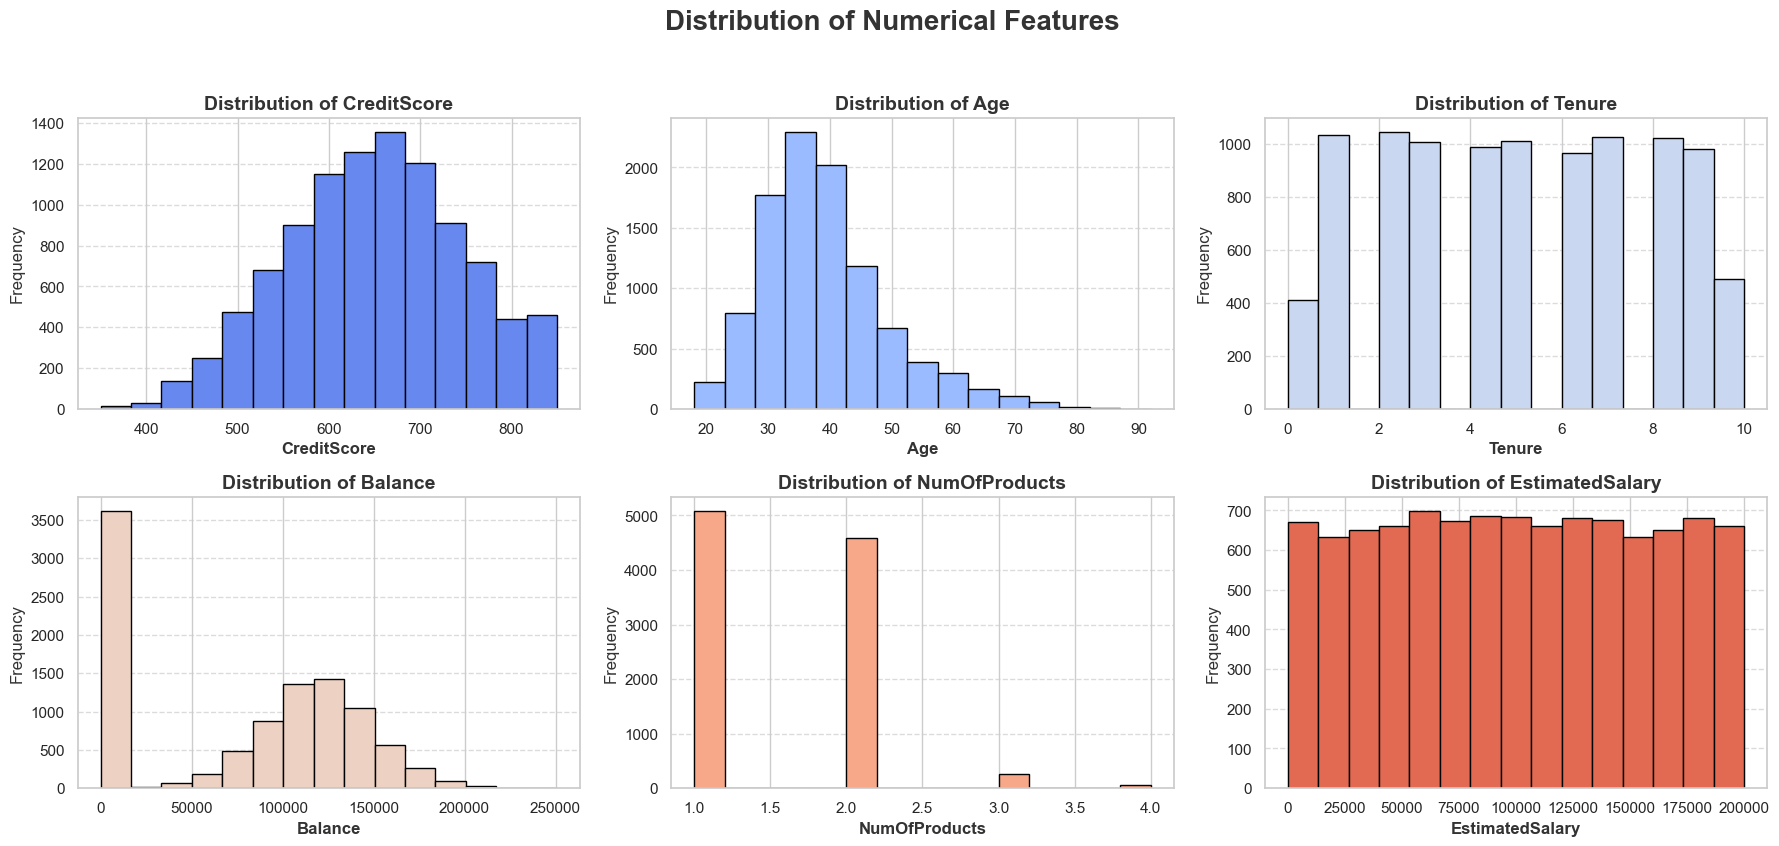

In [33]:
# # # Distribution of Numerical Features
# num_features = customer_df.select_dtypes(include=['int64', 'float64']).columns
# # customer_df[num_features].hist(figsize=(15, 10), bins=15, color='skyblue', edgecolor='black')
# # # plt.suptitle('Distribution of Numerical Features')
# # # plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features excluding specific columns
excluded_columns = ['HasCrCard', 'IsActiveMember', 'Exited']
num_features = [col for col in customer_df.select_dtypes(include=['int64', 'float64']).columns if col not in excluded_columns]

# Set a stylish theme
sns.set_theme(style="whitegrid")

# Define a color palette
palette = sns.color_palette("coolwarm", len(num_features))

# Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))  # Adjust grid based on the number of features
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, col in enumerate(num_features):
    ax = axes[i]
    customer_df[col].plot(kind='hist', bins=15, color=palette[i], edgecolor='black', ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold', color='#333333')
    ax.set_xlabel(col, fontsize=12, fontweight='bold', color='#333333')
    ax.set_ylabel('Frequency', fontsize=12, color='#333333')
    ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set the overall title and adjust spacing
plt.suptitle('Distribution of Numerical Features', fontsize=20, fontweight='bold', color='#333333')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()



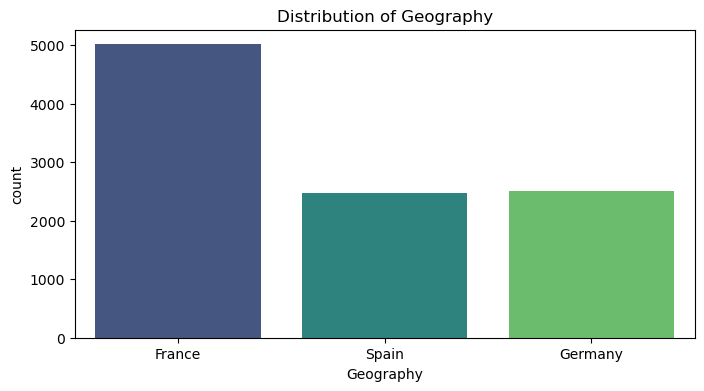

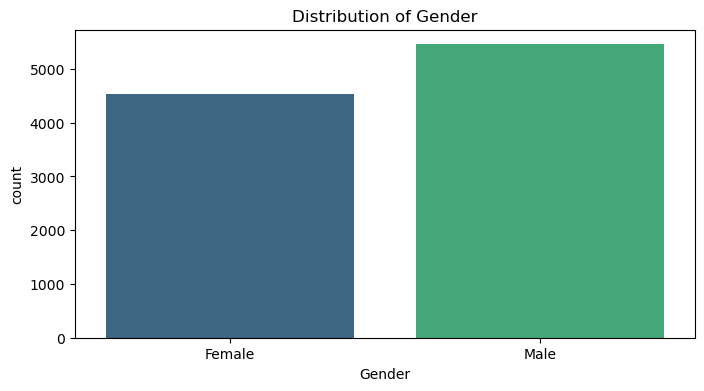

In [31]:
# Exploring Categorical Features
cat_features = customer_df.select_dtypes(include=['object']).columns

# Visualizing the distribution of categorical features
for feature in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, data=customer_df, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.show()


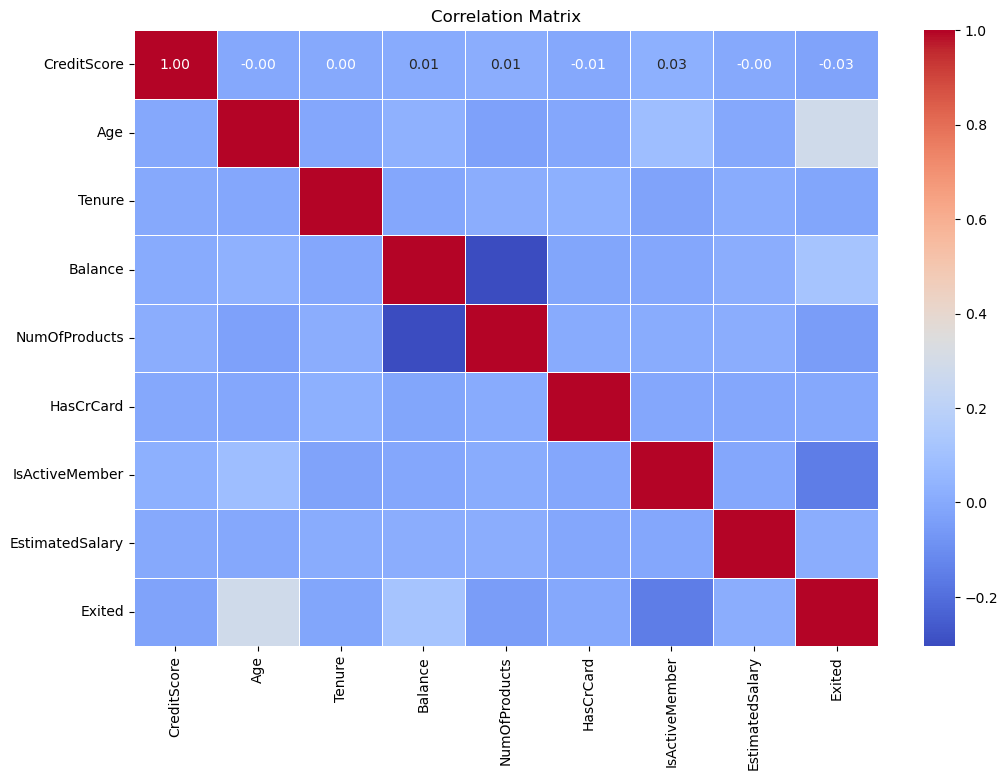

In [32]:
# Correlation Matrix with only numeric features
plt.figure(figsize=(12,8))

# Selecting only numerical features
numeric_features = customer_df.select_dtypes(include=['int64', 'float64'])

# Calculating correlation
corr = numeric_features.corr()

# Plotting the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

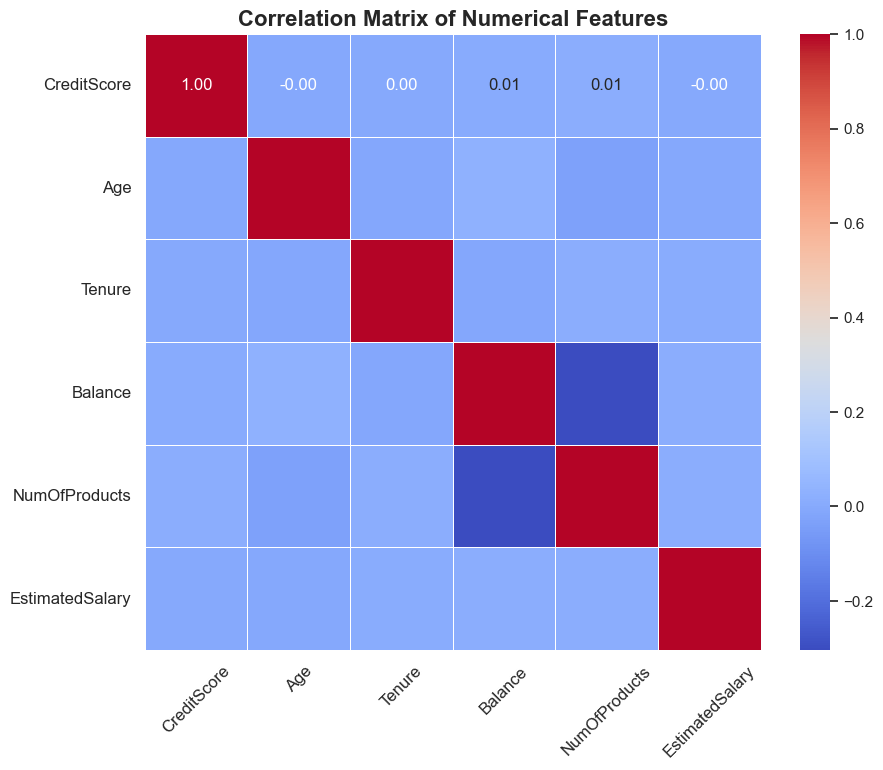

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming customer_df is your DataFrame
# Calculate the correlation matrix
corr_matrix = customer_df[num_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Show the plot
plt.show()


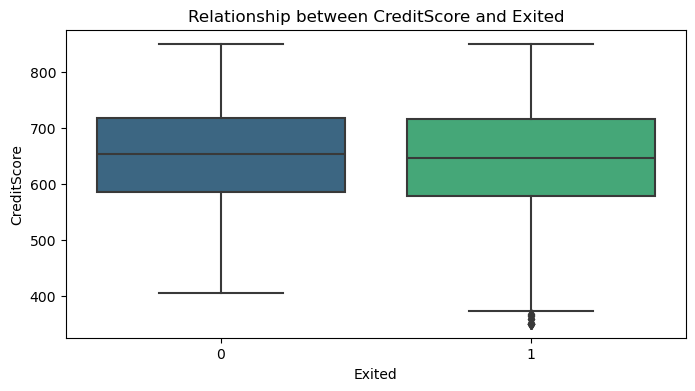

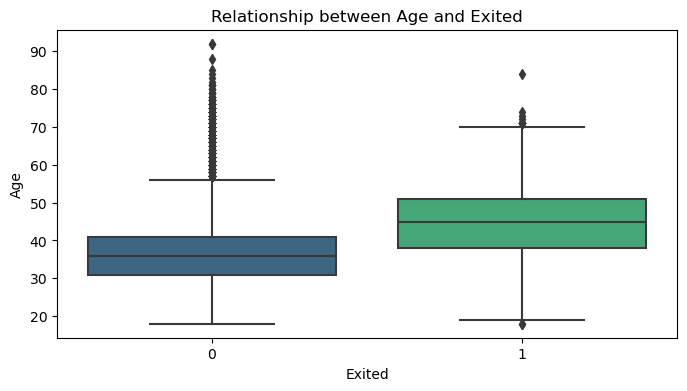

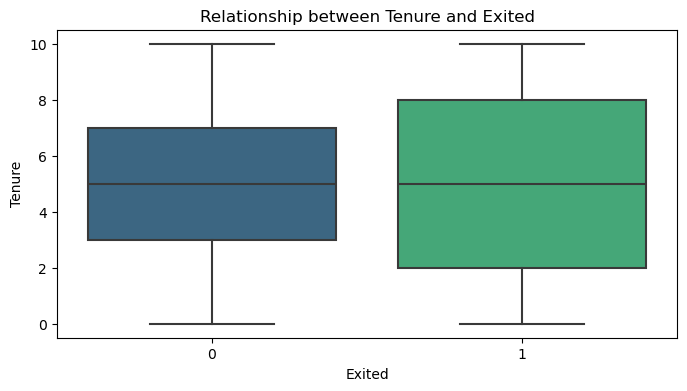

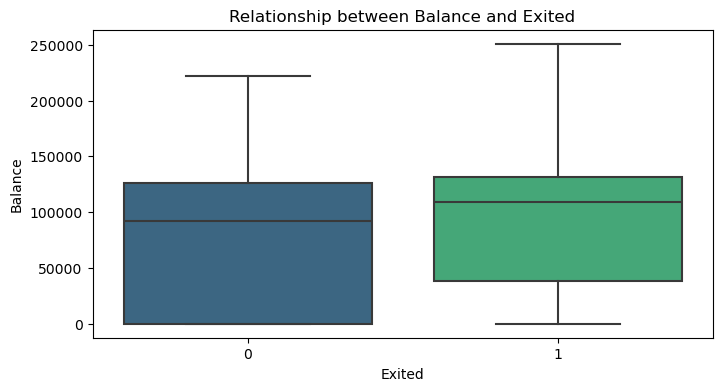

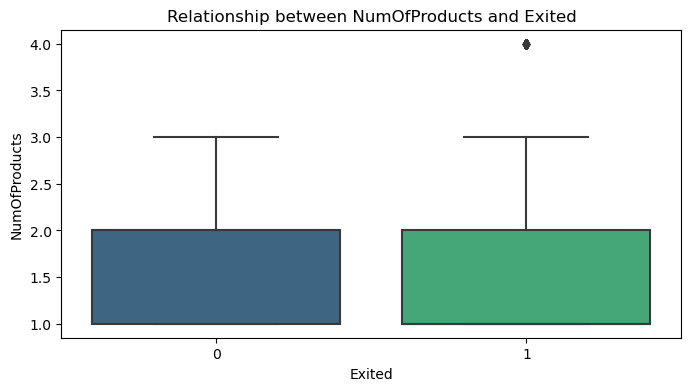

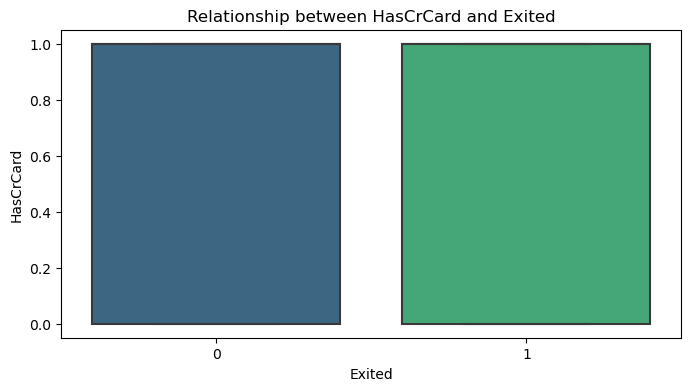

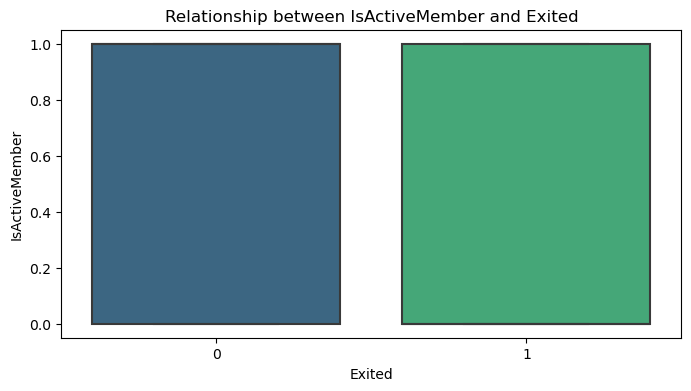

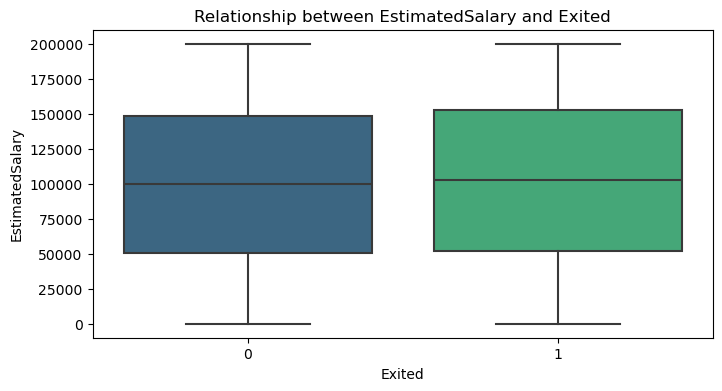

In [33]:
# Exploring Relationships between Features and Target
# Numerical features vs Target
for feature in num_features:
    if feature != 'Exited':  # Exclude the target variable
        plt.figure(figsize=(8,4))
        sns.boxplot(x='Exited', y=feature, data=customer_df, palette='viridis')
        plt.title(f'Relationship between {feature} and Exited')
        plt.show()


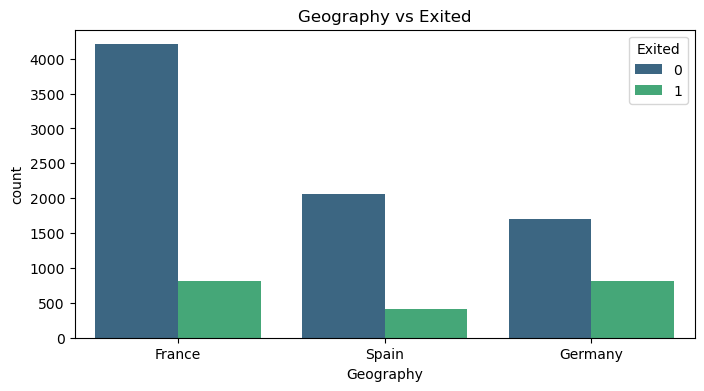

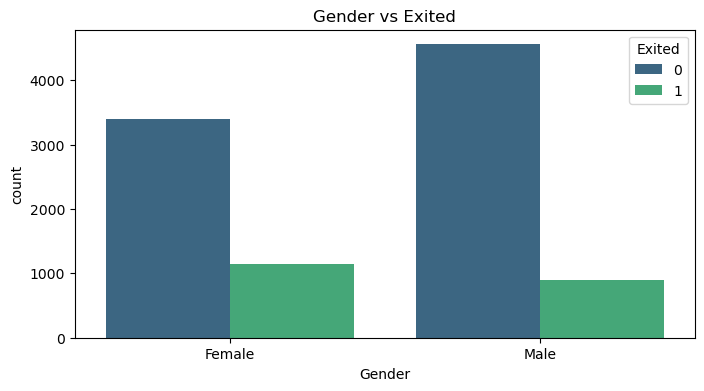

In [34]:
# Categorical features vs Target
for feature in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, hue='Exited', data=customer_df, palette='viridis')
    plt.title(f'{feature} vs Exited')
    plt.show()

In [ ]:
Feature importance in another